<a href="https://colab.research.google.com/github/albertofernandezvillan/ml-dl-cv-notebooks/blob/main/cross_entropy_loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross-Entropy Loss Function

Also called **logarithmic loss**, **log loss** or **logistic loss**. Each predicted class probability is compared to the actual class desired output 0 or 1 and a score/loss is calculated that penalizes the probability based on how far it is from the actual expected value. The penalty is logarithmic in nature yielding a large score for large differences close to 1 and small score for small differences tending to 0.

Cross-entropy loss is used when adjusting model weights during training. The aim is to minimize the loss, i.e, the smaller the loss the better the model. A perfect model has a cross-entropy loss of 0.

`binary_crossentropy`: Used as a loss function for binary classification model. The `binary_crossentropy` function computes the cross-entropy loss between true labels and predicted labels.

`categorical_crossentropy`: Used as a loss function for multi-class classification model where there are two or more output labels. The output label is assigned one-hot category encoding value in form of 0s and 1.

`sparse_categorical_crossentropy`: Used as a loss function for multi-class classification model where the output label is assigned integer value (0, 1, 2, 3…). This loss function is mathematically same as the `categorical_crossentropy`. It just has a different interface.


* https://vitalflux.com/cross-entropy-loss-explained-with-python-examples/
* https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451
* https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e
* https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

In [ ]:
# https://machinelearningmastery.com/cross-entropy-for-machine-learning/

from numpy import asarray
from keras import backend
from keras.losses import binary_crossentropy

# prepare classification data
p = asarray([1, 0, 0, 0])
q = asarray([0.775, 0.116, 0.039, 0.070])

# convert to keras variables
y_true = backend.variable(p)
y_pred = backend.variable(q)

# calculate the average cross-entropy
mean_ce = backend.eval(binary_crossentropy(y_true, y_pred))
print('Average Cross Entropy: %.3f nats' % mean_ce)

Average Cross Entropy: 0.123 nats


In [ ]:
# https://keras.io/api/losses/probabilistic_losses/#binarycrossentropy-class

# Example 1: (batch_size = 1, number of samples = 4)
# y_true (true label): This is either 0 or 1.
# y_pred (predicted value): This is the model's prediction
# which either represents a logit, (i.e, value in [-inf, inf] when from_logits=True) 
# or a probability (i.e, value in [0., 1.] when from_logits=False).

import tensorflow as tf

y_true = [1, 0, 0, 0]
y_pred = [0.775, 0.116, 0.039, 0.070]

bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
res_1 = bce(y_true, y_pred).numpy()
print(res_1)

0.12263538


In [ ]:
import tensorflow as tf

y_true = [1, 1, 1, 1]
y_pred = [0.775, 0.116, 0.039, 0.070]

bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
res_2 = bce(y_true, y_pred).numpy()
print(res_2)

2.0781264


In [ ]:
print((res_1 + res_2)/2)

1.1003808975219727


In [ ]:
import tensorflow as tf

# Example 2: (batch_size = 2, number of samples = 4)  
y_true = [[1, 1], [0, 1], [0, 1], [0, 1]]
y_pred = [[0.775, 0.775], [0.116, 0.116], [0.039, 0.039], [0.070, 0.070]]

bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce(y_true, y_pred).numpy()

1.1003809

<img src="https://miro.medium.com/max/3648/1*wz59MnXkXdWxrq_fkA2wew.png">

In [ ]:
# https://stats.stackexchange.com/questions/303229/why-does-keras-binary-crossentropy-loss-function-return-wrong-values/303254

import keras.backend as K
import numpy as np
import math

def my_binary_crossentropy(y_true, y_pred):
    result = []
    for i in range(len(y_pred)):
        y_pred[i] = [max(min(x, 1 - K.epsilon()), K.epsilon()) for x in y_pred[i]]
        result.append(-np.mean([y_true[i][j] * math.log(y_pred[i][j]) + (1 - y_true[i][j]) * math.log(1 - y_pred[i][j]) for j in range(len(y_pred[i]))]))
    return np.mean(result)

In [ ]:
y_true = np.array([[1, 0, 0, 0]])
y_pred = np.array([[0.775, 0.116, 0.039, 0.070]])

print(my_binary_crossentropy(y_true, y_pred))

0.12263550720499095


In [ ]:
y_true = np.array([[1, 1], [0, 1], [0, 1], [0, 1]])
y_pred = np.array([[0.775, 0.775], [0.116, 0.116], [0.039, 0.039], [0.070, 0.070]])

my_binary_crossentropy(y_true, y_pred)

1.1003816295137243

In [ ]:
y_true = np.ones(100)
y_pred = np.arange(0, 10, 0.1)

In [ ]:
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
bce(y_true, y_pred).numpy()

0.2334638386964798

In [ ]:
# https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

values = []
y_true = [1]

bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
for y_pred in np.arange(0, 1, 0.001):
  res = bce(y_true, [y_pred]).numpy()
  values.append(res)  

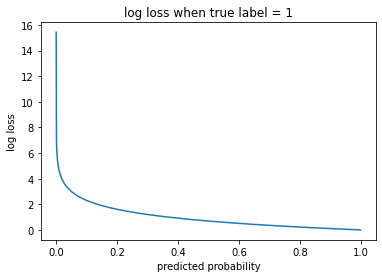

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, 1, 0.001), values)
plt.ylabel('log loss')
plt.xlabel('predicted probability')
plt.title('log loss when true label = 1')
plt.show()

In [ ]:
values = []
y_true = [0]

bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
for y_pred in np.arange(0, 1, 0.001):
  res = bce(y_true, [y_pred]).numpy()
  values.append(res)  

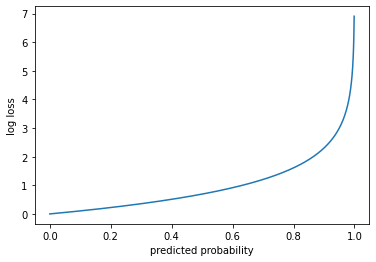

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(0, 1, 0.001), values)
plt.ylabel('log loss')
plt.xlabel('predicted probability')
'log loss when true label = 0'
plt.show()

`CategoricalCrossentropy` class and `SparseCategoricalCrossentropy` class:

In [13]:
import tensorflow as tf
import numpy as np

# CategoricalCrossentropy
# Computes the crossentropy loss between the labels and predictions.
# Use this crossentropy loss function when there are two or more label classes. 
# We expect labels to be provided in a one_hot representation. 
y_true = [[0, 0, 1]]
y_pred = [[0.05, 0.95, 0]]

cce = tf.keras.losses.CategoricalCrossentropy()
print(cce(y_true, y_pred).numpy())

# SparseCategoricalCrossentropy
# Computes the crossentropy loss between the labels and predictions.
# Use this crossentropy loss function when there are two or more label classes. 
# We expect labels to be provided as integers.
y_true = [[2]]
y_pred = [[0.05, 0.95, 0]]

scce = tf.keras.losses.SparseCategoricalCrossentropy()
print(scce(y_true, y_pred).numpy())

16.118095
16.118097


# Python & NumPy utilities

`tf.keras.utils.to_categorical(y, num_classes=None, dtype="float32")`: Converts a class vector (integers) to binary class matrix. E.g. for use with categorical_crossentropy.

In [32]:
a = tf.keras.utils.to_categorical([0, 1, 2, 3], num_classes=4)
a = tf.constant(a, shape=[4, 4])

b = tf.constant([.9, .04, .03, .03,
                 .3, .45, .15, .13,
                 .04, .01, .94, .05,
                 .12, .21, .5, .17],
                shape=[4, 4])

cce = tf.keras.losses.CategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)
print(cce(a, b).numpy())
print(tf.keras.backend.categorical_crossentropy(a, b).numpy())
print(tf.keras.losses.categorical_crossentropy(a, b).numpy())

tf.Tensor(
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], shape=(4, 4), dtype=float32)
[0.10536048 0.8280665  0.10109606 1.7719568 ]
[0.10536048 0.8280665  0.10109606 1.7719568 ]
[0.10536048 0.8280665  0.10109606 1.7719568 ]
